<a href="https://colab.research.google.com/github/Trived10/CS506-Spring2023/blob/main/homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 5 (100 Points)

The focus of this homework will be Network and Graphs as well as Neural Networks.



## Exercise 1 [30pts]

This exercise will focus on Neural Networks and visualization.

a) Write a function that takes a keras network and outputs an image (png format) of the network. [5pts]

You can assume the model is sequential and only uses dense layers. The output image for

```python
    model = keras.models.Sequential()
    model.add(layers.Dense(2, input_dim=2))
    model.add(layers.Dense(1))
    model.compile(loss="binary_crossentropy")
```

should look something like this

In [1]:
from IPython.display import Image
Image(filename="example.png")

FileNotFoundError: ignored

Hint: use the networkx library (specifically the [to_agraph](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_agraph.to_agraph.html) method)

Network visualization saved as example


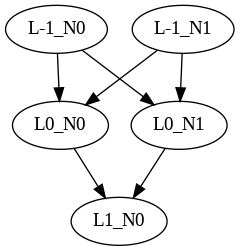

In [2]:
from graphviz import Digraph
from keras.models import Sequential
from keras.layers import Dense
import keras

def visualize_network(model, output_file="network.png"):
    G = Digraph(format="png")

    for i, layer in enumerate(model.layers):
        prev_layer_nodes = model.layers[i - 1].output_shape[-1] if i > 0 else layer.input_shape[-1]
        curr_layer_nodes = layer.output_shape[-1]

        for j in range(prev_layer_nodes):
            for k in range(curr_layer_nodes):
                G.edge(f"L{i-1}_N{j}", f"L{i}_N{k}")

    G.render(output_file, view=False)
    print(f"Network visualization saved as {output_file}")


# Example usage:
model = Sequential()
model.add(Dense(2, input_dim=2))
model.add(Dense(1))
model.compile(loss="binary_crossentropy")

visualize_network(model, "example")

# Display the image
from IPython.display import Image
Image(filename="example.png")


b) Generate 100 datapoints of the form y = 3x + 1 + e where e ~ N(0, 1) and plot the data in a scatter plot [2.5pts]

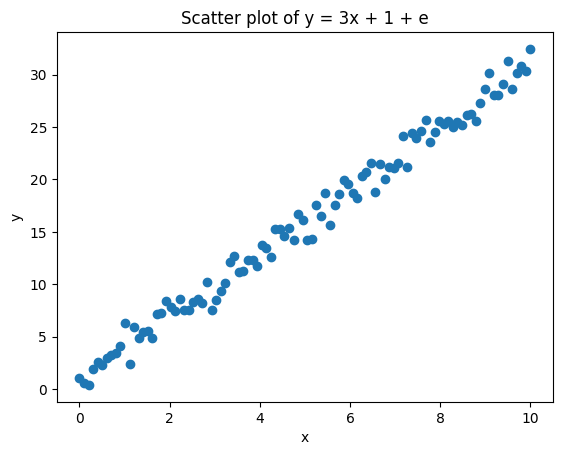

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Generate the data points
x = np.linspace(0, 10, 100)
e = np.random.normal(0, 1, 100)
y = 3 * x + 1 + e

# Create the scatter plot
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot of y = 3x + 1 + e")
plt.show()


c) Create a Neural Network with no hidden layers (just input to ouput each with just one neuron), using the `mean_squared_error` loss and no activation function. Create an image of this model using a) then train this model on the dataset from b). In a 3D plot, plot the weight, the bias, and the loss value. [5pts]

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Network visualization saved as nn_no_hidden_layers.png


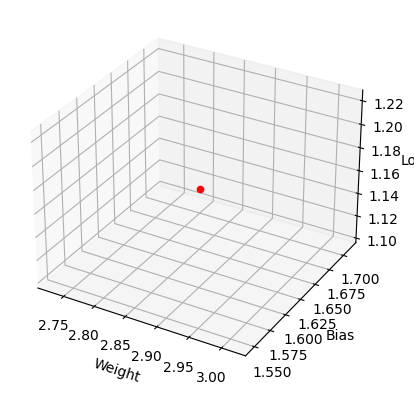

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create the neural network
model = Sequential()
model.add(Dense(1, input_dim=1, activation=None))
model.compile(loss="mean_squared_error", optimizer=Adam(lr=0.01))

# Visualize the network
visualize_network(model, "nn_no_hidden_layers.png")

# Display the image
from IPython.display import Image
Image(filename="nn_no_hidden_layers.png")

# Train the model
history = model.fit(x, y, epochs=100, verbose=0)

# Create a 3D plot of weight, bias, and loss value
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

weight = model.get_weights()[0][0][0]
bias = model.get_weights()[1][0]
loss = history.history['loss']

ax.scatter(weight, bias, loss[-1], c='r', marker='o')

ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.set_zlabel('Loss')

plt.show()


d) Re-train the model from c) and create an animation of the weight, bias, and loss at each training epoch. [5pts]

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


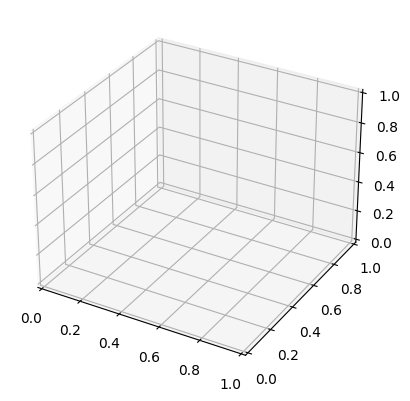

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Create the neural network
model = Sequential()
model.add(Dense(1, input_dim=1, activation=None))
model.compile(loss="mean_squared_error", optimizer=Adam(lr=0.01))

# Number of epochs
epochs = 100

# Train the model and record weights, biases, and losses at each epoch
weights = []
biases = []
losses = []

for _ in range(epochs):
    history = model.fit(x, y, epochs=1, verbose=0)
    weight = model.get_weights()[0][0][0]
    bias = model.get_weights()[1][0]
    loss = history.history['loss'][-1]
    
    weights.append(weight)
    biases.append(bias)
    losses.append(loss)

# Create the 3D plot animation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def update(i):
    ax.clear()
    ax.scatter(weights[i], biases[i], losses[i], c='r', marker='o')
    ax.set_xlabel('Weight')
    ax.set_ylabel('Bias')
    ax.set_zlabel('Loss')
    ax.set_title(f"Epoch {i+1}")

ani = FuncAnimation(fig, update, frames=range(epochs), interval=200)
plt.show()

ani.save('weight_bias_loss_animation.mp4', fps=5, extra_args=['-vcodec', 'libx264'])


e) Generate data of the form y = 3x^3 + 2x^2 + x + 1 + e where e ~ N(0, 1) and plot the data in a scatter plot [2.5pts]

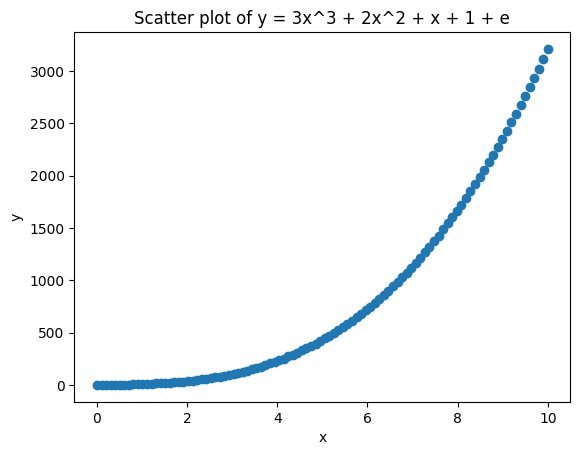

In [12]:
x = np.linspace(0, 10, 100)
e = np.random.normal(0, 1, 100)
y = 3 * x**3 + 2 * x**2 + x + 1 + e

# Create the scatter plot
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot of y = 3x^3 + 2x^2 + x + 1 + e")
plt.show()

f) Create and train a neural network on the dataset from b) and plot the resulting curve through the scatter plot. (you can use any number of epochs, hidden layers etc.) Also create an image of the network using the function from a) [5pts]

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Network visualization saved as nn_task_e.png
4/4 [==============================] - 0s 3ms/step


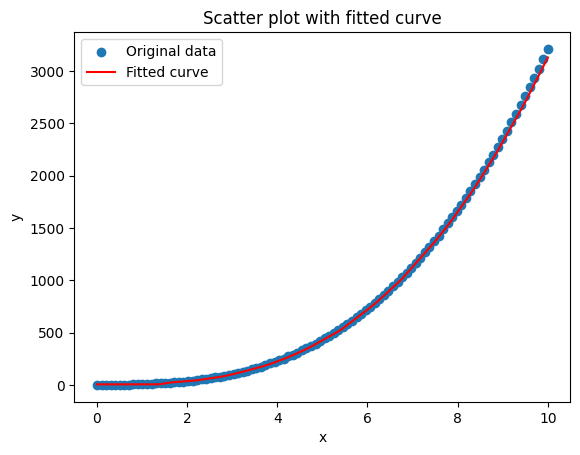

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Create the neural network
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation=None))
model.compile(loss="mean_squared_error", optimizer=Adam(lr=0.01))

# Visualize the network
visualize_network(model, "nn_task_e.png")

# Display the image
from IPython.display import Image
Image(filename="nn_task_e.png")

# Train the model
model.fit(x, y, epochs=1000, verbose=0)

# Predict the y values using the trained model
y_pred = model.predict(x)

# Create the scatter plot
plt.scatter(x, y, label='Original data')
plt.plot(x, y_pred, 'r', label='Fitted curve')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot with fitted curve")
plt.legend()
plt.show()


g) Using matplotlib animation, create an animation of the resulting curve from your model at each training epoch (up to 100 epochs). [5pts]

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 3ms/step


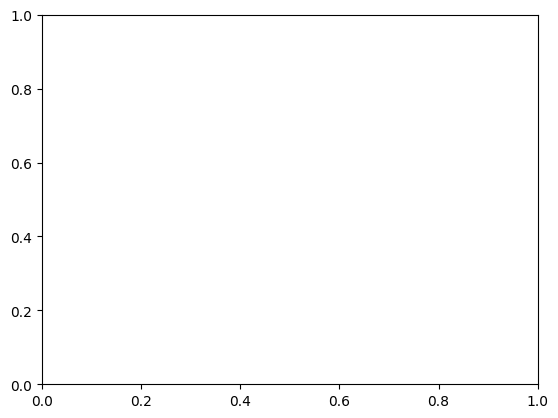

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Generate the data points
x = np.linspace(0, 10, 100)
e = np.random.normal(0, 1, 100)
y = 3 * x**3 + 2 * x**2 + x + 1 + e

# Create the neural network
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation=None))
model.compile(loss="mean_squared_error", optimizer=Adam(lr=0.01))

# Number of epochs
epochs = 100

# Train the model and record the predictions at each epoch
predictions = []

for _ in range(epochs):
    model.fit(x, y, epochs=1, verbose=0)
    y_pred = model.predict(x)
    predictions.append(y_pred)

# Create the animation
fig, ax = plt.subplots()

def update(i):
    ax.clear()
    ax.scatter(x, y, label='Original data')
    ax.plot(x, predictions[i], 'r', label='Fitted curve')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(f"Scatter plot with fitted curve (Epoch {i+1})")
    ax.legend()

ani = FuncAnimation(fig, update, frames=range(epochs), interval=200)
plt.show()

# Save the animation
ani.save('curve_animation.mp4', fps=5, extra_args=['-vcodec', 'libx264'])


## Exercise 2 [50pts]

In this excerise we will be implementing logic gates in various forms.

### Part A: <b> [25pts] </b>

Recall in a logistic regression model we would find the weights and bias such that 
$$P(y=1)=\sigma(w_1 x_1 + w_2 x_2 + b)$$

This means that when $w_1 x_1 + w_2 x_2 + b >0 $ we would predict y = 1. Moving b to the other side, we notice that only when $w_1 x_1 + w_2 x_2 < b $ do we predict y = 1. So the term b acts as a threshold past which the weighted sum of x's would cause the model to predict one class over the other.

In this part you are asked to find (not through gradient descent but through your own understanding of the functions below) the weights and threshold that appropriately describe the function being modeled.

Additional Resource/Hint: [Realization of Logic Gates Using MccullochPitts Neuron Model](https://ijettjournal.org/assets/year/2017/volume-45/number-2/IJETT-V45P212.pdf)

a) Implement the following logic gates <b> - [20pts] </b> <br> 
<ul>
    <li>2 input AND gate</li>
    <li>2 input OR gate</li>
    <li>2 input NOR gate</li>
    <li>1 input NOT gate</li>
    <li>2 input NAND gate</li>
</ul>

by finding the correct weights and threshold.

Additional Resource:[Boolean Algebra Truth Tables for Logic Gate Functions](https://www.electronics-tutorials.ws/boolean/bool_7.html#:~:text=The%20table%20used%20to%20represent,of%20these%20input(s).)

In [15]:
"""
params
--------------
a = input 1
b = input 2

other definations
--------------
w1 = weight associated with input 1
w2 = weight associated with input 2

returns
--------------
Y = output of the gate
"""
def and_gate(a,b):
    w1 = 1  #TODO set weight w1
    w2 = 1  #TODO set weight w2
    g = w1*a + w2*b
    threshold = 1.5 #TODO: set threshold
    if g > threshold :
        return 1
    else:
        return 0

def or_gate(a,b):
    w1 = 1  #TODO set weight w1
    w2 = 1  #TODO set weight w2
    g = w1*a + w2*b
    threshold = 0.5 #TODO: set threshold
    if g > threshold :
        return 1
    else:
        return 0
        
def not_gate(a):
    w1 = -1  #TODO set weight w1
    g = w1*a
    threshold = -0.5 #TODO: set threshold
    if g > threshold :
        return 1
    else:
        return 0

def nor_gate(a,b):
    w1 = -1  #TODO set weight w1
    w2 = -1  #TODO set weight w2
    g = w1*a + w2*b
    threshold = -0.5 #TODO: set threshold
    if g > threshold :
        return 1
    else:
        return 0
        
def nand_gate(a,b):
    w1 = -1  #TODO set weight w1
    w2 = -1  #TODO set weight w2
    g = w1*a + w2*b
    threshold = -1.5 #TODO: set threshold
    if g > threshold :
        return 1
    else:
        return 0 

In [16]:
# run this cell to check your fucntions
# the output provided it just a sample output. you can check for any values of a and b

def gates(c, a, b=None):
    if c == 1:
        return and_gate(a, b)
    elif c == 2:
        return or_gate(a, b)    
    elif c == 3:
        return not_gate(a)    
    elif c == 4:
        return nor_gate(a, b)  
    elif c == 5:
        return nand_gate(a, b)
    else:
        return "Please check your choice"
        
def inputv(c):
    a = int(input(("Enter 1st value: ")))
    if (a>1 or a<0):
        print("Please check input")
    else:    
        if c!=3:
            b = int(input(("Enter 2st value: ")))
            if (b>1 or b<0):
                print("Please check input") 
            return(a,b)    
    return(a)


while True:
    c = int(input("\n\nEnter your choice 1.AND 2.OR 3.NOT 4.NOR 5.NAND 6.exit\n"))
    if c == 6:
        break
    elif c not in range(1, 7):
        print("Please enter a valid choice")
        continue
    else:
        if c != 3:
            a = int(input("Enter 1st value: "))
            b = int(input("Enter 2nd value: "))
            if a not in [0, 1] or b not in [0, 1]:
                print("Please check input")
                continue
        else:
            a = int(input("Enter value: "))
            if a not in [0, 1]:
                print("Please check input")
                continue
        y = gates(c, a, b)
        print("Y =", y)



Enter your choice 1.AND 2.OR 3.NOT 4.NOR 5.NAND 6.exit
1
Enter 1st value: 1
Enter 2nd value: 0
Y = 0


Enter your choice 1.AND 2.OR 3.NOT 4.NOR 5.NAND 6.exit
2
Enter 1st value: 0
Enter 2nd value: 1
Y = 1


Enter your choice 1.AND 2.OR 3.NOT 4.NOR 5.NAND 6.exit
3
Enter value: 1
Y = 0


Enter your choice 1.AND 2.OR 3.NOT 4.NOR 5.NAND 6.exit
4
Enter 1st value: 1
Enter 2nd value: 1
Y = 0


Enter your choice 1.AND 2.OR 3.NOT 4.NOR 5.NAND 6.exit
5
Enter 1st value: 1
Enter 2nd value: 0
Y = 1


Enter your choice 1.AND 2.OR 3.NOT 4.NOR 5.NAND 6.exit
2
Enter 1st value: 0
Enter 2nd value: 0
Y = 0


Enter your choice 1.AND 2.OR 3.NOT 4.NOR 5.NAND 6.exit
6


b) implement a XOR gate <b> - [5pts] </b>

Hint: XOR can be implemented as a combination of OR, NAND and AND gates. You can reuse your functions from above

In [17]:
def xor_gate(a, b):
    or_result = or_gate(a, b)
    nand_result = nand_gate(a, b)
    xor_result = and_gate(or_result, nand_result)
    return xor_result


### Part B: Perceptron Learning Rule [25pts]

a) Inspired by the previous homework's implementation of logistic regression, implement a 2 input OR gate using perceptron learning rule <b>- [20pts] </b>

Recall: A perceptron is a no-hidden-layer neural network (like logistic regression) with a single output that is the activation of a weighted sum (plus a bias) of the inputs.

Your implementation should:
- use a bias
- have a configurable input size (the output size will always be 1)
- have a configurable learning rate
- have a configurable number of epochs
- have a configurable batch size
- support at least two types of activation functions
- support at least two types of losses / cost functions

In [20]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    """
    Implement a perceptron network
    """
    def __init__(self, input_size, activation_function='step', loss_function='mse', learning_rate=0.1, epochs=10, batch_size=1):
        self.weights = np.random.randn(input_size + 1)  # Initialize weights and bias
        self.activation_function = activation_function
        self.loss_function = loss_function
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size

    def activation(self, x):
        if self.activation_function == 'step':
            return np.where(x > 0, 1, 0)
        elif self.activation_function == 'sigmoid':
            return 1 / (1 + np.exp(-x))
        else:
            raise ValueError("Unsupported activation function")

    def loss(self, y_true, y_pred):
        if self.loss_function == 'mse':
            return np.mean((y_true - y_pred) ** 2)
        elif self.loss_function == 'cross_entropy':
            return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        else:
            raise ValueError("Unsupported loss function")

    def fit(self, X, y):
        X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias term to input

        for epoch in range(self.epochs):
            for i in range(0, len(X), self.batch_size):
                X_batch = X[i:i+self.batch_size]
                y_batch = y[i:i+self.batch_size]

                y_pred = self.activation(np.dot(X_batch, self.weights))
                error = y_batch - y_pred
                self.weights += self.learning_rate * np.dot(error, X_batch)

            # Calculate and print loss at the end of each epoch
            y_pred = self.activation(np.dot(X, self.weights))
            epoch_loss = self.loss(y, y_pred)
            print(f'Epoch {epoch+1}, Loss: {epoch_loss}')

if __name__ == '__main__':
    X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ])
    y = np.array([0, 1, 1, 1])

    perceptron_or = Perceptron(input_size=2, activation_function='sigmoid', loss_function='mse', learning_rate=0.1, epochs=20, batch_size=1)
    perceptron_or.fit(X, y)
    print("Weights and bias after training:", perceptron_or.weights)
    

Epoch 1, Loss: 0.16009309125097002
Epoch 2, Loss: 0.14849481451697472
Epoch 3, Loss: 0.13994459078067437
Epoch 4, Loss: 0.133490098368956
Epoch 5, Loss: 0.12848951217238316
Epoch 6, Loss: 0.12450872664086535
Epoch 7, Loss: 0.1212515281131592
Epoch 8, Loss: 0.11851354638456851
Epoch 9, Loss: 0.11615212661030566
Epoch 10, Loss: 0.1140665592939866
Epoch 11, Loss: 0.11218499721495961
Epoch 12, Loss: 0.11045570046386548
Epoch 13, Loss: 0.10884110517225119
Epoch 14, Loss: 0.10731375420606269
Epoch 15, Loss: 0.10585347040799241
Epoch 16, Loss: 0.10444536937515922
Epoch 17, Loss: 0.1030784465308382
Epoch 18, Loss: 0.10174456181406949
Epoch 19, Loss: 0.10043770287379064
Epoch 20, Loss: 0.09915344550309257
Weights and bias after training: [0.25343708 1.20771726 1.14206244]


b) How were the weights and biases you discovered in part B different from the ones you defined in part A for the OR gate? [5pts]

The weights I discovered in part A are through manual calculation by understanding the OR gate logic but whereas in part B I have used perceptron learning algorithm to determine the weights and biases through gradient descent based on provided loss function, activation function, epochs and learning rate. It differs from the exact values we have manually derived but every algorithm derived weights and bias also supports the OR gate logic if the loss is low enough and also they differ based on the activation, loss functions, epochs and learning rate in part B.

## Exercise 3 [20pts]

This exercise will focus on Neural Networks.



In [21]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn 
import torch.nn.functional as F
import torchvision 
import torchvision.transforms as transforms 
from torch.optim import SGD, Adam
from tqdm import tqdm 

a) Modify the number of layers to include atleast 2 hidden layers with appropriate number of neurons that use the sigmoid function in the forward pass. Also change the epochs, criterion, batch_size. [5pts]

In [40]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, 800)
        self.layer2 = nn.Linear(800, 400)
        self.layer3 = nn.Linear(400, 300)
        self.layer4 = nn.Linear(300, 200)  
        self.layer5 = nn.Linear(200, 100)  
        self.output = nn.Linear(100, 10)
        self.dropout = nn.Dropout(0.2)

    def forward(self, input):
        x = F.sigmoid(self.layer1(input))
        x = F.sigmoid(self.layer2(x))
        x = F.sigmoid(self.layer3(x))
        x = F.sigmoid(self.layer4(x))  
        x = F.sigmoid(self.layer5(x))  
        x = self.dropout(x)
        outputs = self.output(x)

        return F.softmax(outputs, dim=1)

epochs = 20
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.MSELoss()
batch_size = 500

Run the following cell everytime you update the above code

In [41]:
net = NeuralNetwork(784).to(device)
optimizer = Adam(net.parameters(), lr = 1e-2)

total_loss = 0


#######################################
### Downloading the data


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = torch.utils.data.DataLoader(training_data, batch_size = batch_size, shuffle = True, num_workers=2)
train_dataloader2 = torch.utils.data.DataLoader(training_data, batch_size = batch_size, shuffle = True, num_workers=2)

test_dataloader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = True, num_workers=2)
test_dataloader2 = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = True, num_workers=2)

b) You may change the architecture to increase the accuracy of this model. The goal is to attain the highest possible accuracy. You do not get marks for accuracies less than 83%. You may modify the values in part a [10pts]

In [42]:
for epoch in tqdm(range(epochs)): 
  epoch_loss = 0
  for i, data in enumerate(train_dataloader): 
    inputs, labels = data 

    optimizer.zero_grad() 
    outputs = net(inputs.view(batch_size,-1).to(device))

    labels_ = F.one_hot(labels, num_classes= 10)

    loss = criterion(outputs,labels_.to(device).float())
    loss.backward()  # update network parameters

    optimizer.step() # update the optimizer parameters 

    total_loss += loss.item() 
    epoch_loss += loss.item()
  
  with torch.no_grad():
    net.eval()
    correct = 0
    total = 0
    for i, data in enumerate(train_dataloader2):
      input, labels = data
      outputs = net(input.view(batch_size,-1).to(device))

      total+= len(labels)

      predictions = torch.argmax(outputs, dim = 1)
      predictions = predictions.to("cpu").numpy() 
      correct += sum(1*(labels.numpy()==predictions))
  
  with torch.no_grad():
    net.eval()
    correct_test = 0
    total_test = 0
    for i, data in enumerate(test_dataloader):
      input, labels = data
      outputs = net(input.view(batch_size,-1).to(device))

      total_test+= len(labels)

      predictions = torch.argmax(outputs, dim = 1)
      predictions = predictions.to("cpu").numpy() 
      correct_test += sum(1*(labels.numpy()==predictions))

  print("epoch = ", epoch, " loss = ", epoch_loss, "  training accuracy = ", correct/total, "test accuracy = ", correct_test/total_test)

  5%|▌         | 1/20 [00:17<05:27, 17.25s/it]

epoch =  0  loss =  10.81653282046318   training accuracy =  0.1 test accuracy =  0.1


 10%|█         | 2/20 [00:33<05:02, 16.80s/it]

epoch =  1  loss =  9.618800193071365   training accuracy =  0.4623833333333333 test accuracy =  0.4566


 15%|█▌        | 3/20 [00:51<04:51, 17.14s/it]

epoch =  2  loss =  5.715905990451574   training accuracy =  0.7261166666666666 test accuracy =  0.7236


 20%|██        | 4/20 [01:07<04:30, 16.92s/it]

epoch =  3  loss =  4.328240716829896   training accuracy =  0.7767833333333334 test accuracy =  0.7675


 25%|██▌       | 5/20 [01:24<04:10, 16.70s/it]

epoch =  4  loss =  3.655288103967905   training accuracy =  0.79855 test accuracy =  0.7861


 30%|███       | 6/20 [01:42<04:03, 17.42s/it]

epoch =  5  loss =  3.49269937351346   training accuracy =  0.7978333333333333 test accuracy =  0.7851


 35%|███▌      | 7/20 [02:00<03:45, 17.35s/it]

epoch =  6  loss =  3.317988581955433   training accuracy =  0.8115333333333333 test accuracy =  0.7975


 40%|████      | 8/20 [02:16<03:25, 17.12s/it]

epoch =  7  loss =  3.0326639730483294   training accuracy =  0.8387666666666667 test accuracy =  0.8259


 45%|████▌     | 9/20 [02:33<03:06, 16.95s/it]

epoch =  8  loss =  2.8424582928419113   training accuracy =  0.8500333333333333 test accuracy =  0.8345


 50%|█████     | 10/20 [02:51<02:52, 17.28s/it]

epoch =  9  loss =  2.7320631183683872   training accuracy =  0.8566666666666667 test accuracy =  0.8397


 55%|█████▌    | 11/20 [03:08<02:34, 17.13s/it]

epoch =  10  loss =  2.729690756648779   training accuracy =  0.8621 test accuracy =  0.8399


 60%|██████    | 12/20 [03:24<02:15, 16.97s/it]

epoch =  11  loss =  2.6512250620871782   training accuracy =  0.85575 test accuracy =  0.8384


 65%|██████▌   | 13/20 [03:42<02:00, 17.26s/it]

epoch =  12  loss =  2.6627159975469112   training accuracy =  0.86715 test accuracy =  0.8469


 70%|███████   | 14/20 [03:59<01:42, 17.10s/it]

epoch =  13  loss =  2.5345872323960066   training accuracy =  0.8651666666666666 test accuracy =  0.8418


 75%|███████▌  | 15/20 [04:16<01:25, 17.02s/it]

epoch =  14  loss =  2.5064684860408306   training accuracy =  0.8668333333333333 test accuracy =  0.8473


 80%|████████  | 16/20 [04:33<01:08, 17.09s/it]

epoch =  15  loss =  2.445087297819555   training accuracy =  0.8619 test accuracy =  0.8439


 85%|████████▌ | 17/20 [04:50<00:51, 17.17s/it]

epoch =  16  loss =  2.4239327339455485   training accuracy =  0.8673666666666666 test accuracy =  0.8453


 90%|█████████ | 18/20 [05:07<00:33, 16.98s/it]

epoch =  17  loss =  2.4356125462800264   training accuracy =  0.8717666666666667 test accuracy =  0.8501


 95%|█████████▌| 19/20 [05:24<00:16, 16.87s/it]

epoch =  18  loss =  2.42584328353405   training accuracy =  0.8712833333333333 test accuracy =  0.8489


100%|██████████| 20/20 [05:41<00:00, 17.10s/it]

epoch =  19  loss =  2.4370592357590795   training accuracy =  0.8697 test accuracy =  0.8482


d) Explain in ~150 words your choice of architecture and parameters, and your general process. [5pts]

I have first started off making the architecture meeting the basic requirements asked to reach in part A of this part in exercise3 which is adding two hidden layers and making the forward pass use sigmoid activation. Then I have increased the number of epochs to 20 from 10 and also used MSELoss instead of CrossEntropyLoss as the criterion while also setting the batch_size as 512 instead of the given 500. Now I have initially just tried with the made changes and tested on how the model performs. But I faced matrix multiplication errors sue to their shapes, so I reverted back to the original batch_size that was given. After that with the two hidden layers and sigmoid as activation function the model performed decent but couldn't reach the desired accuracy, so I tried using relu activation function instead of sigmoid and it seemed to deteriorate the performance so have reverted back to sigmoid. Then finally I have added two extra hidden layers and then tried to run the model which have surpassed the target accuracy. 